<a href="https://colab.research.google.com/github/pedroavellar/Estatistica-DataAnalysis/blob/master/T1Estat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Olá**! Este notebook faz parte de um trabalho de estatística de análise de dados. A explicação mais detalhada sobre o trabalho e o conjunto de dados pode ser encontrada no relatório deste em https://github.com/pedroavellar/Estatistica-DataAnalysis.

O conjunto de dados foi fornecido, completado com valores arbitrários, removido o título, transformado em csv e colocado no github para ser usado aqui.

Primeiro, vamos importar a biblioteca pandas, para manipulação e análise de dados.

Em seguida, lemos o arquivo com os dados e guardamos na variável 'data'. Esta variável tem um formato do pandas chamado 'Dataframe', que organiza os dados em uma tabela bem organizada como mostrado depois da leitura.

In [151]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/pedroavellar/Estatistica-DataAnalysis/master/Conjunto%20de%20dados_completo.csv'
data = pd.read_csv(uri)
data

,Identificação do Funcionário,Idade,Salário (em salários mínimos),Número de filhos,Altura,Gênero,Escolaridade,Horas trabalhadas na última semana,Região de Procedência,Peso
0,1,36,"4,9",1,"1,73",Masculino,superior,43,São Paulo,"69,4"
1,2,27,"6,4",1,"1,73",Masculino,fundamental,41,São Paulo,"90,9"
2,3,26,"6,1",2,"1,73",Masculino,médio,44,Interior,"78,3"
3,4,37,"4,8",1,"1,65",Feminino,superior,40,Interior,"66,7"
4,5,35,"8,2",2,"1,52",Feminino,médio,39,São Paulo,"65,8"
5,6,32,"5,5",5,"1,75",Masculino,superior,42,Interior,"75,7"
6,7,31,"3,6",1,"1,71",Masculino,médio,42,São Paulo,"69,3"
7,8,40,"6,6",1,"1,78",Masculino,superior,40,São Paulo,"83,6"
8,9,29,"6,5",1,"1,77",Masculino,médio,42,Interior,"53,7"
9,10,32,"7,1",0,"1,67",Feminino,superior,42,São Paulo,"62,3"


Podemos ver que o arquivo foi lido perfeitamente.

Mas temos algumas questões pra resolver antes de começar a analisar...

PS: Os códigos da próxima seção devem ser executados antes de executar os posteriores.

# **Pré-processamento e Análise inicial**

Primeiro, o python e o pandas não reconhecem números decimais com vírgula, então vamos substituir por ponto.

In [0]:
data.replace('\,', '.', regex=True, inplace=True)
# Trocando todas as vírgulas por ponto
# Inplace como true serve para a ação ser salva no local original

In [153]:
data.head()

,Identificação do Funcionário,Idade,Salário (em salários mínimos),Número de filhos,Altura,Gênero,Escolaridade,Horas trabalhadas na última semana,Região de Procedência,Peso
0,1,36,4.9,1,1.73,Masculino,superior,43,São Paulo,69.4
1,2,27,6.4,1,1.73,Masculino,fundamental,41,São Paulo,90.9
2,3,26,6.1,2,1.73,Masculino,médio,44,Interior,78.3
3,4,37,4.8,1,1.65,Feminino,superior,40,Interior,66.7
4,5,35,8.2,2,1.52,Feminino,médio,39,São Paulo,65.8


Agora o valor pode ser reconhecido como númerico, mas ainda temos que informar que eles são para o dataframe. Usamos o to_numeric nas colunas para isso.

In [154]:
data.dtypes

Identificação do Funcionário           int64
Idade                                  int64
Salário (em salários mínimos)         object
Número de filhos                       int64
Altura                                object
Gênero                                object
Escolaridade                          object
Horas trabalhadas na última semana     int64
Região de Procedência                 object
Peso                                  object
dtype: object

In [0]:
data["Salário (em salários mínimos)"] = pd.to_numeric(data["Salário (em salários mínimos)"])
data["Altura"] = pd.to_numeric(data["Altura"])
data["Peso"] = pd.to_numeric(data["Peso"])

In [156]:
data.dtypes

Identificação do Funcionário            int64
Idade                                   int64
Salário (em salários mínimos)         float64
Número de filhos                        int64
Altura                                float64
Gênero                                 object
Escolaridade                           object
Horas trabalhadas na última semana      int64
Região de Procedência                  object
Peso                                  float64
dtype: object

Pronto. Por último, vamos tirar a coluna de identificação já que ela não tem utilidade em uma análise. E renomear a coluna do salário, pra facilitar nas chamadas.

E finalmente vamos encontrar algumas medidas dessas variáveis.

In [0]:
data.drop(columns=['Identificação do Funcionário'], inplace=True)

In [0]:
data.rename(columns = {'Salário (em salários mínimos)':'Salário'}, inplace=True)

In [159]:
data.describe()

,Idade,Salário,Número de filhos,Altura,Horas trabalhadas na última semana,Peso
count,50.000000,50.000000,50.000000,50.000000,50.0000,50.00000
mean,33.980000,5.374000,1.400000,1.711000,42.3400,71.29600
std,4.488034,1.851289,1.160577,0.086855,2.6466,11.12282
min,24.000000,1.600000,0.000000,1.520000,37.0000,42.60000
25%,31.000000,3.875000,1.000000,1.670000,40.0000,65.65000
50%,33.000000,5.500000,1.000000,1.710000,42.0000,69.75000
75%,38.000000,6.750000,2.000000,1.757500,44.0000,79.12500
max,43.000000,8.500000,5.000000,1.960000,51.0000,106.50000


In [160]:
data.describe(include = 'object')

,Gênero,Escolaridade,Região de Procedência
count,50,50,50
unique,2,3,3
top,Masculino,médio,São Paulo
freq,32,28,32


Como pedido no trabalho, três variáveis, uma de cada tipo, deveriam ser escolhidas para análise. Foram escolhidas: Idade, Salário e Escolaridade.

# **Idade**

In [161]:
print(data['Idade'].count())
print(data['Idade'].min())
print(data['Idade'].max())

50
24
43


In [162]:
print(data['Idade'].mean()) # Média
print(data['Idade'].median()) # Mediana
print(data['Idade'].mode()) # Moda

33.98
33.0
0    32
1    38
dtype: int64


In [163]:
print(data['Idade'].quantile([0.25,0.5,0.75])) # Primeiro, Segundo e Terceiro quartis

0.25    31.0
0.50    33.0
0.75    38.0
Name: Idade, dtype: float64


Medidas de dispersão

In [164]:
#Amplitude
print(data['Idade'].max()-data['Idade'].min())
#Intervalo interquartil
print(data['Idade'].quantile(0.75)-data['Idade'].quantile(0.25))
#Variância
print(data['Idade'].var())
#Desvio padrão
print(data['Idade'].std())
#Coeficiente de Variação
print((data['Idade'].std()/data['Idade'].mean())*100)

19
7.0
20.142448979591837
4.48803397709864
13.207869267506297


In [165]:
#Tabela de frequencia
freq_table = pd.crosstab(index=data["Idade"], columns="count")
fr = freq_table/freq_table.sum()
freq_table = pd.concat([freq_table, fr], axis=1, join='inner')
freq_table.columns = ['freq_abs', 'freq_rel']
freq_table

,freq_abs,freq_rel
Idade,,
24,1,0.02
25,1,0.02
26,1,0.02
27,1,0.02
28,1,0.02
29,3,0.06
30,2,0.04
31,5,0.10
32,7,0.14


In [0]:
a = data['Idade'].value_counts(sort=False)

Text(0, 0.5, 'Número de funcionários')

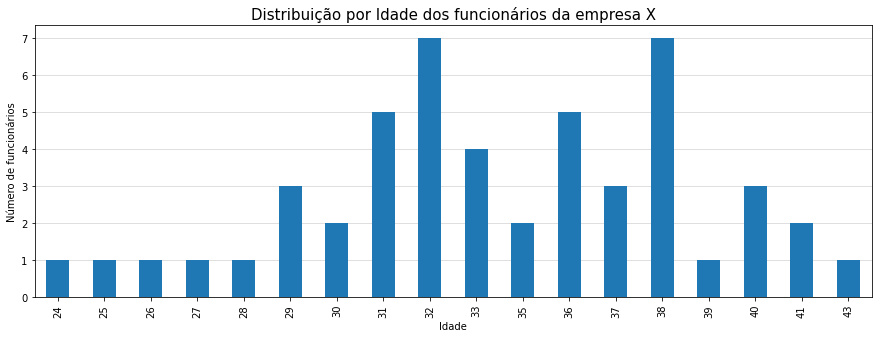

In [167]:
# Plotando o gráfico de barras Idade x Número de funcionários
ax = a.plot(kind='bar', figsize=(15,5), title="Distribuição por Idade dos funcionários da empresa X", zorder=3)
ax.grid(axis='y', alpha=0.5, zorder=0)
ax.title.set_size(15)
ax.set_xlabel("Idade")
ax.set_ylabel("Número de funcionários")

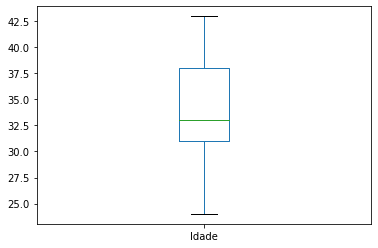

In [168]:
data.boxplot(column='Idade', grid=False)

# **Salário**

In [169]:
print(data['Salário'].count())
print(data['Salário'].min())
print(data['Salário'].max())

50
1.6
8.5


In [170]:
print(data['Salário'].mean()) # Média
print(data['Salário'].median()) # Mediana
print(data['Salário'].mode()) # Moda

5.3740000000000006
5.5
0    5.5
dtype: float64


In [171]:
print(data['Salário'].quantile([0.25,0.5,0.75])) # Primeiro, Segundo e Terceiro quartis

0.25    3.875
0.50    5.500
0.75    6.750
Name: Salário, dtype: float64


Medidas de dispersão

In [172]:
#Amplitude
print(data['Salário'].max()-data['Salário'].min())
#Intervalo interquartil
print(data['Salário'].quantile(0.75)-data['Salário'].quantile(0.25))
#Variância
print(data['Salário'].var())
#Desvio padrão
print(data['Salário'].std())
#Coeficiente de Variação
print((data['Salário'].std()/data['Salário'].mean())*100)

6.9
2.8750000000000004
3.4272693877551004
1.8512885749539698
34.44898725258596


In [173]:
# Construindo tabela de frequência
k = 8
h = (data['Salário'].max()-data['Salário'].min())/k # Amplitude da classe
h

0.8625

In [0]:
data['Intervalo Salário'] = pd.cut(data['Salário'].sort_values(), k)

In [175]:
b = data['Intervalo Salário'].value_counts(sort=False)
b

(1.593, 2.463]    3
(2.463, 3.325]    6
(3.325, 4.188]    5
(4.188, 5.05]     6
(5.05, 5.912]     8
(5.912, 6.775]    9
(6.775, 7.638]    6
(7.638, 8.5]      7
Name: Intervalo Salário, dtype: int64

Text(0.5, 0, 'Salário (em salários mínimos)')

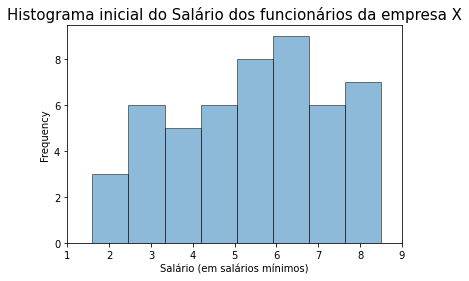

In [176]:
new_ax2 = data['Salário'].plot.hist(bins=8, alpha=0.5, histtype='bar', ec='black', 
                                xticks=interval, title='Histograma inicial do Salário dos funcionários da empresa X')
new_ax2.title.set_size(15)
new_ax2.set_xlabel("Salário (em salários mínimos)")

Arredondamos por conveniência LI1 para 1 e h para 1

Text(0.5, 0, 'Salário (em salários mínimos)')

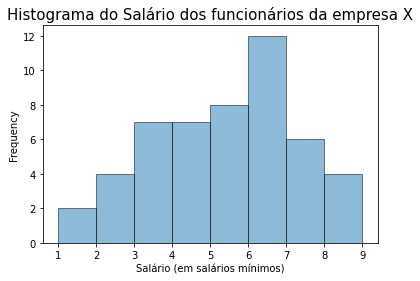

In [177]:
interval = [1,2,3,4,5,6,7,8,9]
ax2 = data['Salário'].plot.hist(bins=interval, alpha=0.5, histtype='bar', ec='black', 
                                xticks=interval, title='Histograma do Salário dos funcionários da empresa X')
ax2.title.set_size(15)
ax2.set_xlabel("Salário (em salários mínimos)")

In [179]:
#Tabela de frequencia
freq_table2 = pd.cut(data['Salário'].sort_values(), interval, right=False).value_counts(sort=False)
fr2 = freq_table2/freq_table2.sum()
freq_table2 = pd.concat([freq_table2, fr2], axis=1, join='inner')
freq_table2.columns = ['freq_abs', 'freq_rel']
freq_table2

,freq_abs,freq_rel
"[1, 2)",2,0.04
"[2, 3)",4,0.08
"[3, 4)",7,0.14
"[4, 5)",7,0.14
"[5, 6)",8,0.16
"[6, 7)",12,0.24
"[7, 8)",6,0.12
"[8, 9)",4,0.08


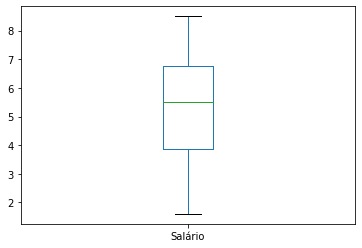

In [180]:
data.boxplot(column='Salário', grid=False)

# **Escolaridade**

In [181]:
c = data['Escolaridade'].value_counts()
c

médio          28
superior       19
fundamental     3
Name: Escolaridade, dtype: int64

In [182]:
c/sum(c)

médio          0.56
superior       0.38
fundamental    0.06
Name: Escolaridade, dtype: float64

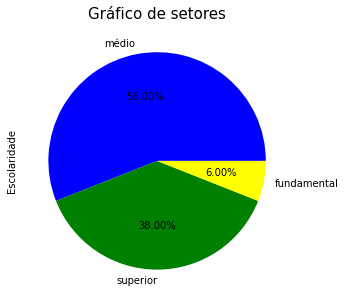

In [183]:
ax3 = c.plot(kind='pie', figsize=(5,5), title="Gráfico de setores", autopct = "%.2f%%", colors = ['blue', 'green', 'yellow'])
ax3.title.set_size(15)

# **Análise Bivariada (Idade e Salário)**

In [184]:
data_biv = data[['Idade', 'Salário']]
data_biv.head()

,Idade,Salário
0,36,4.9
1,27,6.4
2,26,6.1
3,37,4.8
4,35,8.2


In [185]:
# Matriz de correlação de Pearson
print('Matriz de correlação:')
data_biv.corr(method='pearson')

Matriz de correlação:


,Idade,Salário
Idade,1.00000,-0.09463
Salário,-0.09463,1.00000


In [186]:
# Matriz de covariância
print('Matriz de covariância:')
data_biv.cov()

Matriz de covariância:


,Idade,Salário
Idade,20.142449,-0.786245
Salário,-0.786245,3.427269


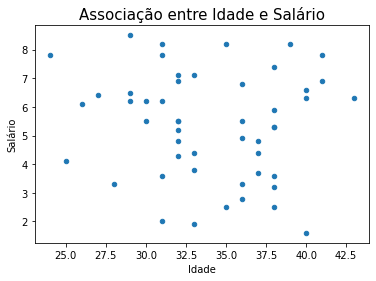

In [187]:
ax4 = data_biv.plot.scatter(x='Idade', y='Salário', title='Associação entre Idade e Salário')
ax4.title.set_size(15)